In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pip install numpy==1.8.0

In [2]:
data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Churn_Modelling.csv?raw=true')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
data['Gender'] = data['Gender'].map({"Female":1,"Male":0})

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data = pd.get_dummies(data,columns=['Geography'],dtype='int')

In [9]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [10]:
X = data.drop('Exited',axis=1)
Y = data['Exited']

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [12]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(min_samples_split=40)

In [13]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=40)

In [14]:
predictions = decision_tree.predict(X_test)

# Checking The Model's Performance

In [15]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1577
           1       0.64      0.57      0.60       423

    accuracy                           0.84      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [16]:
from sklearn.datasets import load_iris
from sklearn import tree

In [17]:
clf = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=10)
iris = load_iris()

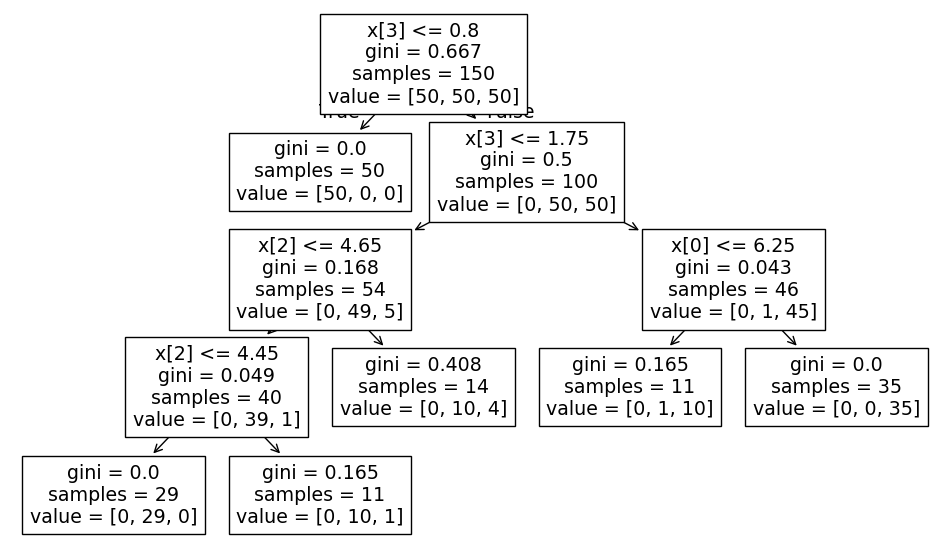

In [18]:
clf = clf.fit(iris.data, iris.target)
plt.figure(figsize=(12,7))
tree.plot_tree(clf)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=40)

In [26]:
random_forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=40)

In [27]:
predictions = random_forest.predict(X_test)

In [28]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.76      0.50      0.60       423

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

